<a href="https://colab.research.google.com/github/luccaquemel/luccaquemel/blob/main/IA_marketing_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [113]:
df = pd.read_csv("KAG_conversion_data.csv")

In [114]:
type(df)

pandas.core.frame.DataFrame

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [13]:
df.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

In [15]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [17]:
df.describe(include="all")

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143,1143,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
unique,NaN,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,30-34,M,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,426,592,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.872611e+05,1067.382327,133783.989501,NaN,NaN,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,NaN,NaN,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,NaN,NaN,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,NaN,NaN,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,NaN,NaN,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,NaN,NaN,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000


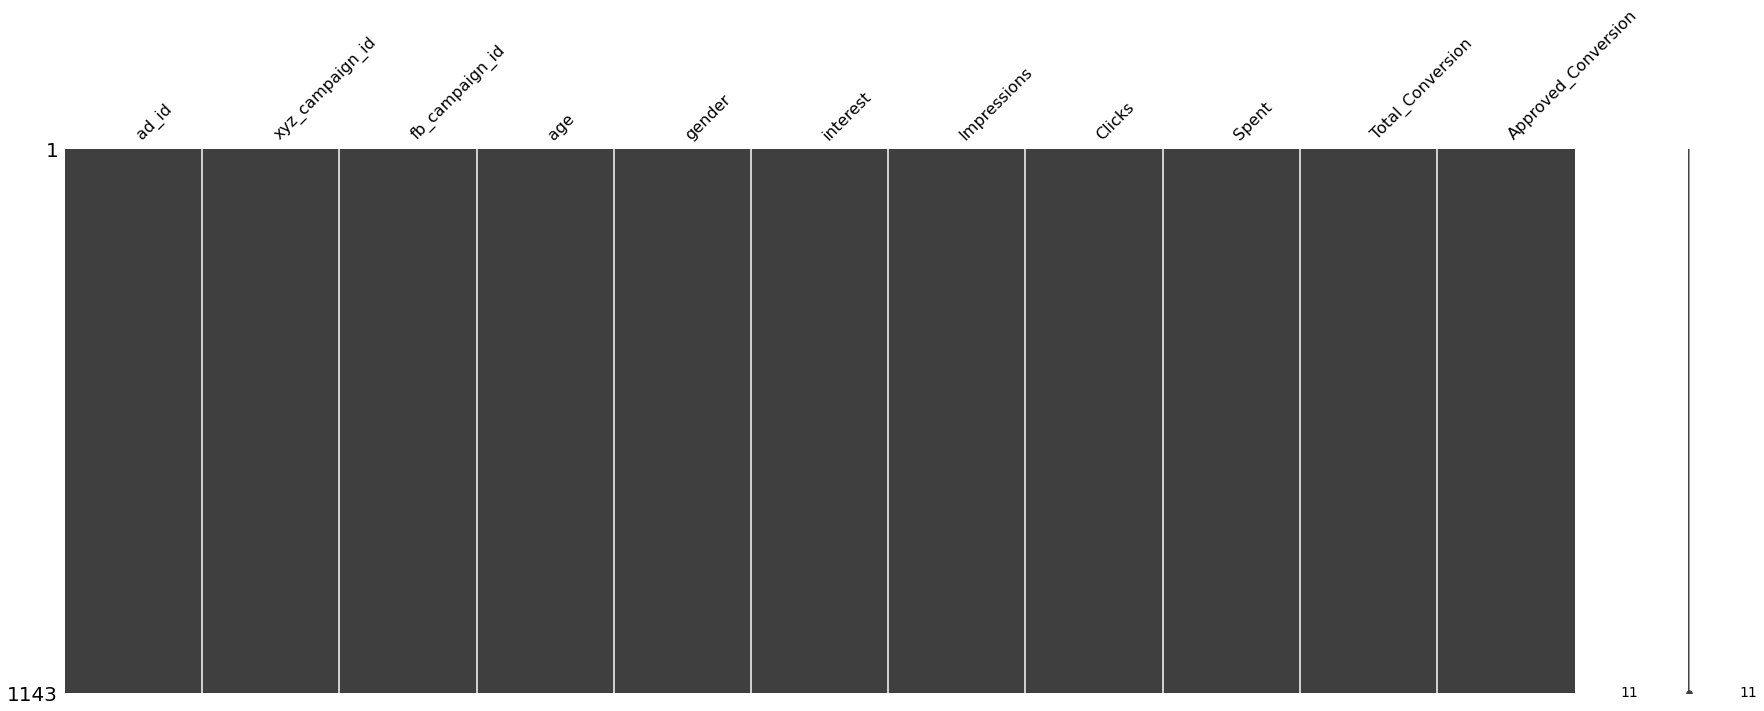

In [24]:
missingno.matrix(df, figsize=(30,10))

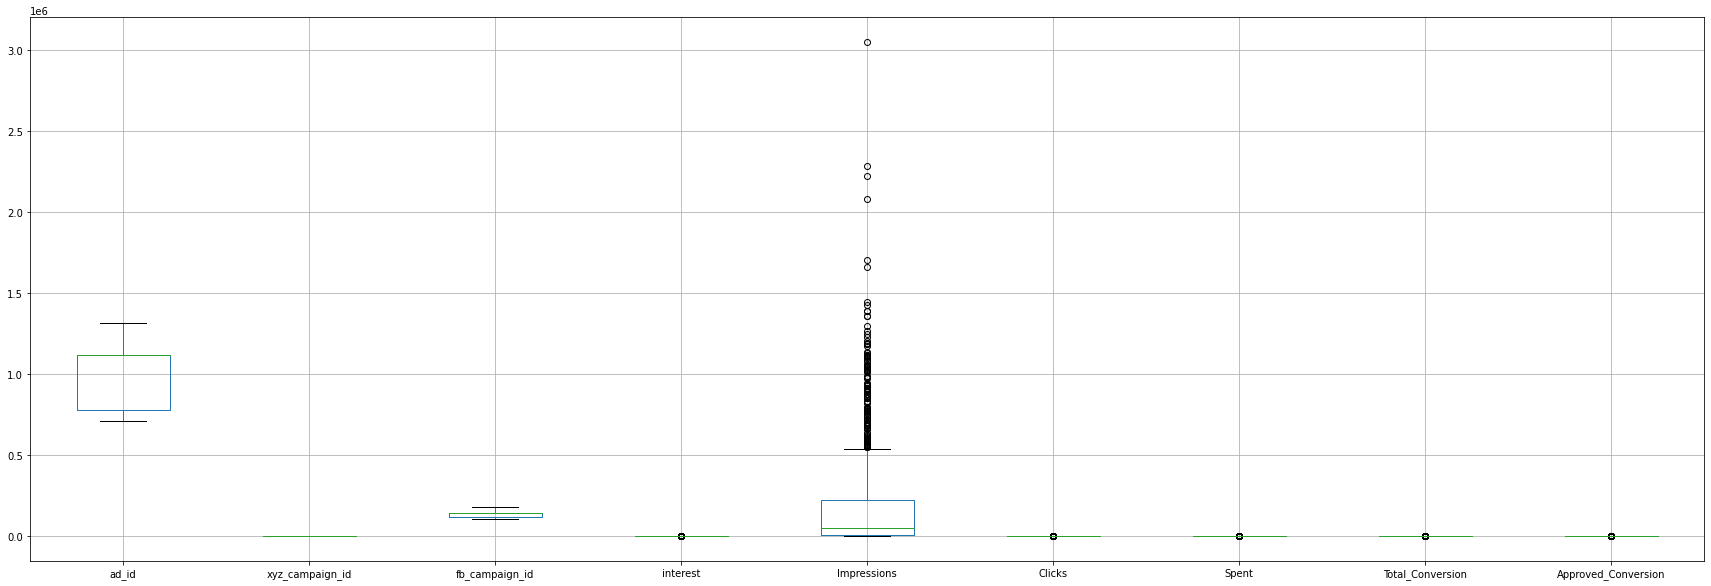

In [29]:
plt.figure(figsize=(30,10))
df.boxplot()
plt.show()

In [30]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1138    False
1139    False
1140    False
1141    False
1142    False
Length: 1143, dtype: bool

In [31]:
df[df.duplicated()]

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion


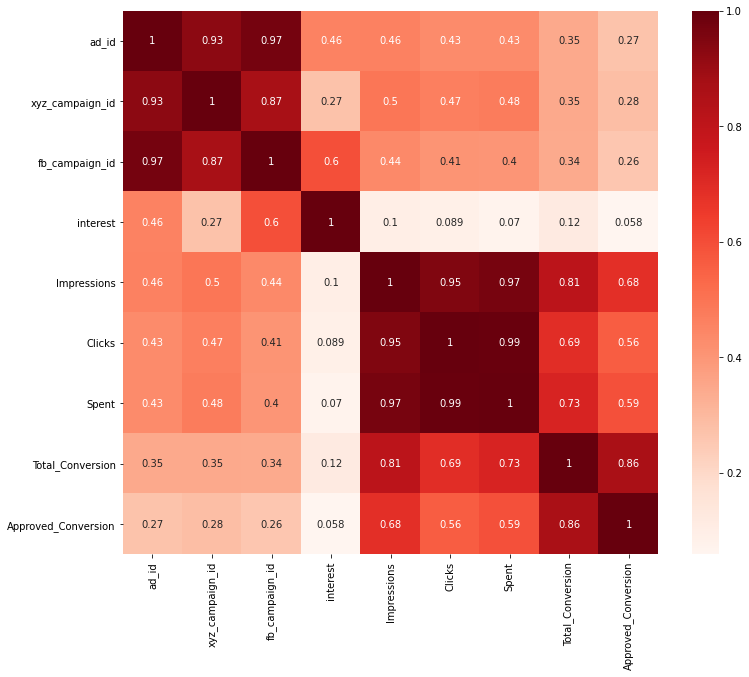

In [39]:
plt.figure(figsize=(12,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

In [56]:
df["xyz_campaign_id"].nunique()

3

In [57]:
df["xyz_campaign_id"].unique()

array([ 916,  936, 1178])

In [62]:
df["xyz_campaign_id"].replace({916:"campanha_1", 936:"campanha_2", 1178:"campanha_3"}, inplace=True)

In [63]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,campanha_1,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,campanha_1,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,campanha_1,103920,30-34,M,20,693,0,0.00,1,0
3,708815,campanha_1,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,campanha_1,103928,30-34,M,28,4133,1,1.29,1,1


<function matplotlib.pyplot.show>

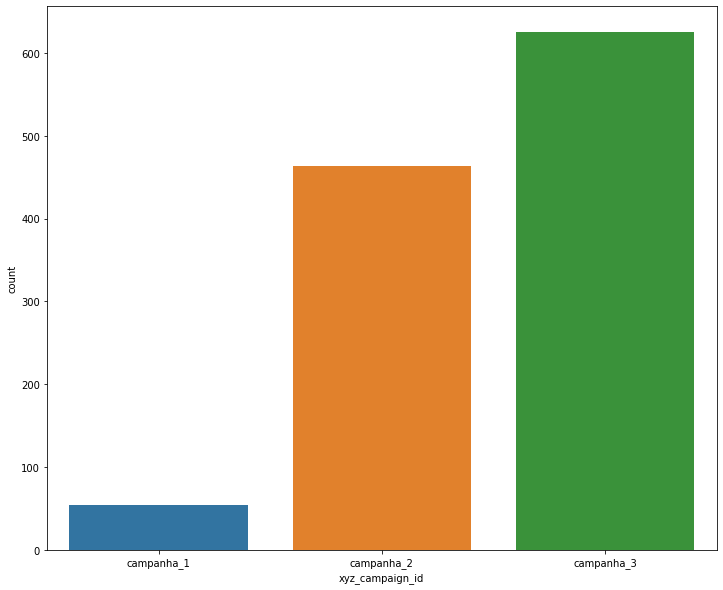

In [64]:
plt.figure(figsize=(12,10))
sns.countplot(x="xyz_campaign_id", data=df)
plt.show

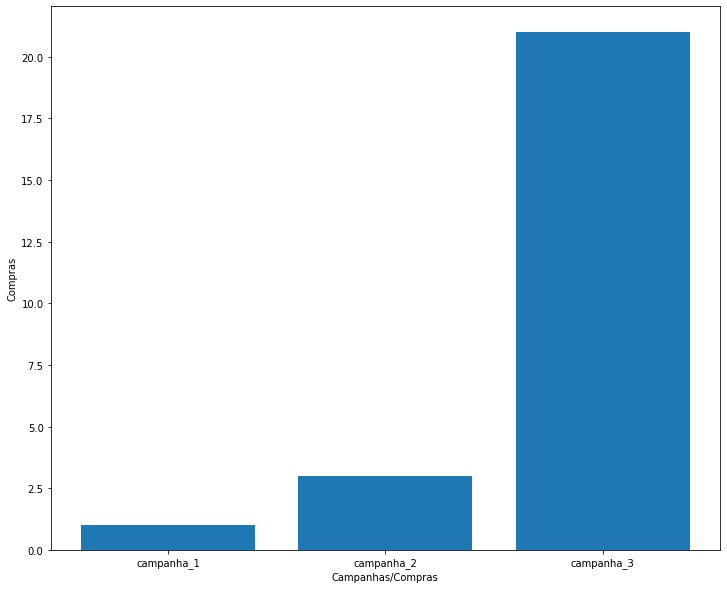

In [67]:
plt.figure(figsize=(12,10))
plt.bar(df["xyz_campaign_id"], df["Approved_Conversion"])
plt.ylabel("Compras")
plt.xlabel("Campanhas/Compras")
plt.show()

In [68]:
df["age"].nunique()

4

In [69]:
df["age"].unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

<function matplotlib.pyplot.show>

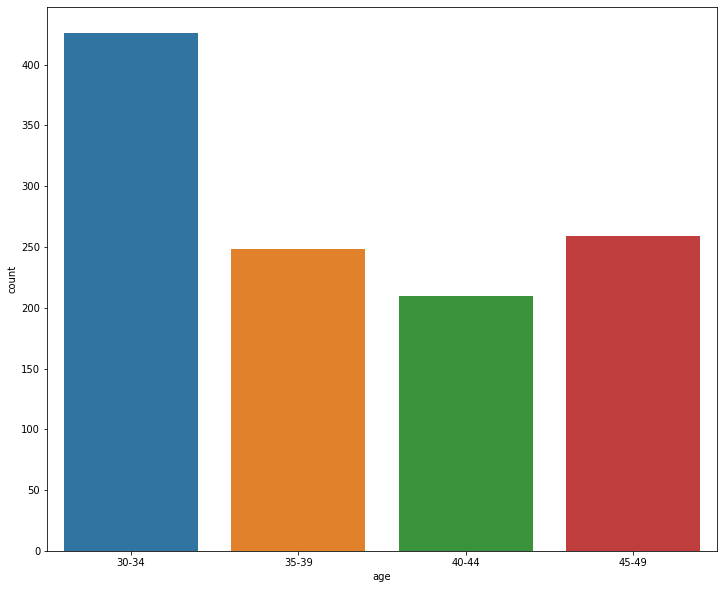

In [70]:
plt.figure(figsize=(12,10))
sns.countplot(x="age", data=df)
plt.show

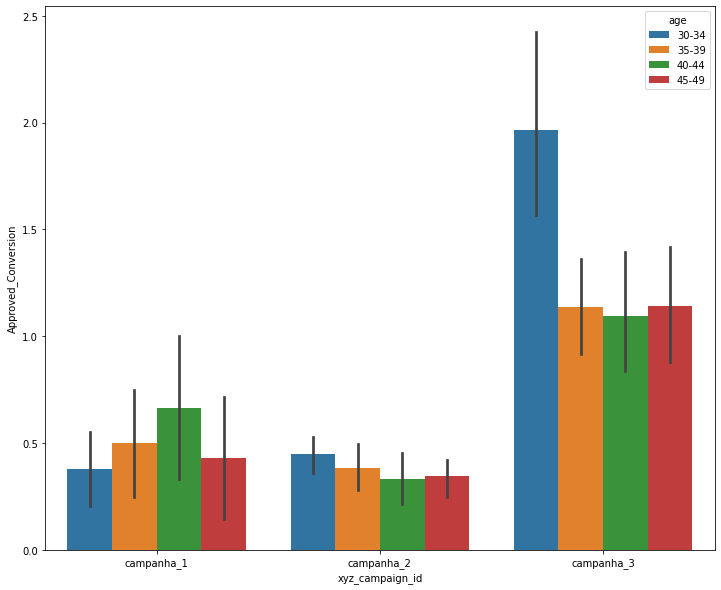

In [72]:
plt.figure(figsize=(12,10))
tips = sns.load_dataset("tips")
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["age"], data=tips)
plt.show()

<function matplotlib.pyplot.show>

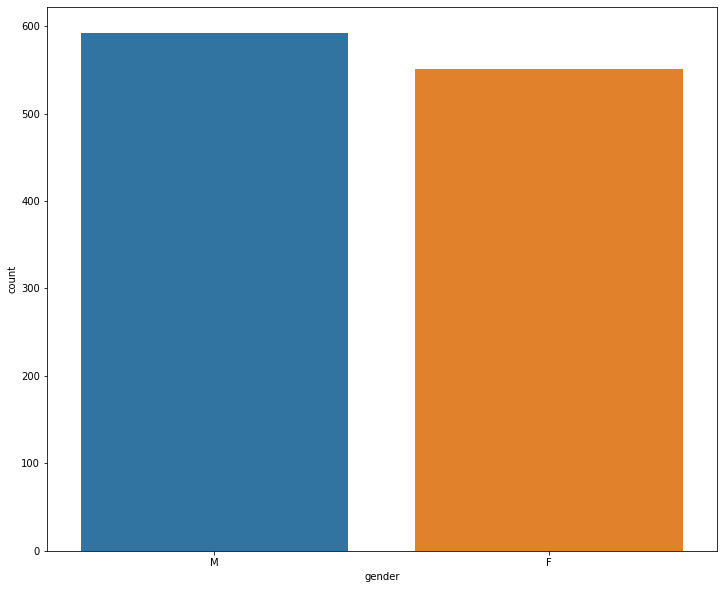

In [73]:
plt.figure(figsize=(12,10))
sns.countplot(x="gender", data=df)
plt.show

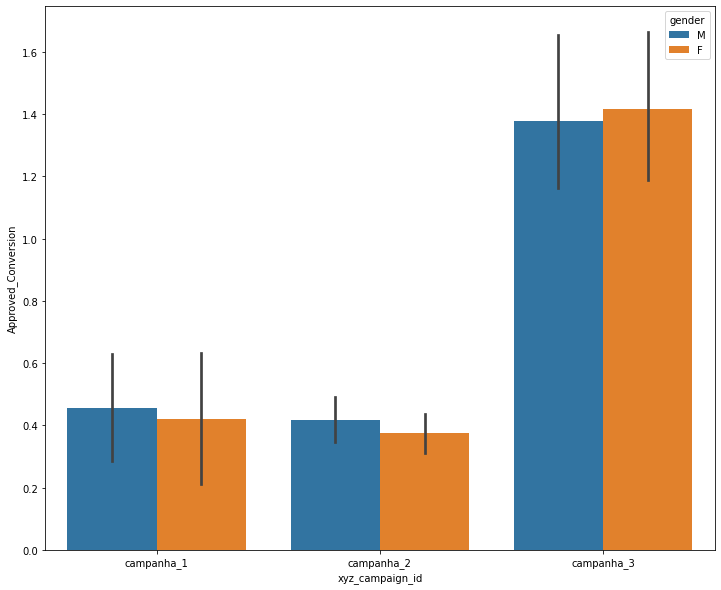

In [74]:
plt.figure(figsize=(12,10))
tips = sns.load_dataset("tips")
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["gender"], data=tips)
plt.show()

In [76]:
df.shape

(1143, 11)

In [77]:
amostra_df = df.sample(n=20)

In [78]:
amostra_df.shape

(20, 11)

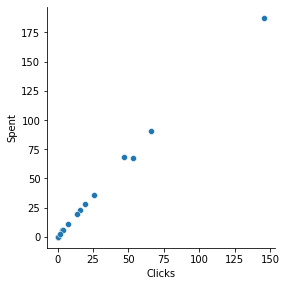

In [81]:
sns.pairplot(amostra_df, x_vars=["Clicks"], y_vars=["Spent"], height=4, kind="scatter")
plt.show()

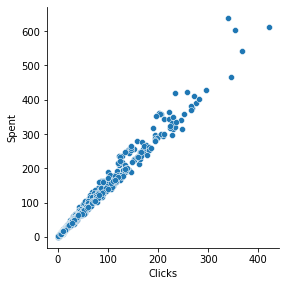

In [82]:
sns.pairplot(df, x_vars=["Clicks"], y_vars=["Spent"], height=4, kind="scatter")
plt.show()

In [83]:
df = df.replace("30-34",0.0011)
df = df.replace("35-39",0.0012)
df = df.replace("40-44",0.0013)
df = df.replace("45-49",0.0014)

In [84]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,campanha_1,103916,0.0011,M,15,7350,1,1.43,2,1
1,708749,campanha_1,103917,0.0011,M,16,17861,2,1.82,2,0
2,708771,campanha_1,103920,0.0011,M,20,693,0,0.00,1,0
3,708815,campanha_1,103928,0.0011,M,28,4259,1,1.25,1,0
4,708818,campanha_1,103928,0.0011,M,28,4133,1,1.29,1,1


In [86]:
df = df.replace("M",1)
df = df.replace("F",0)

In [87]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,campanha_1,103916,0.0011,1,15,7350,1,1.43,2,1
1,708749,campanha_1,103917,0.0011,1,16,17861,2,1.82,2,0
2,708771,campanha_1,103920,0.0011,1,20,693,0,0.00,1,0
3,708815,campanha_1,103928,0.0011,1,28,4259,1,1.25,1,0
4,708818,campanha_1,103928,0.0011,1,28,4133,1,1.29,1,1


In [90]:
x = df[["age", "gender", "interest", "Impressions", "Clicks"]]

In [92]:
y = df["Spent"]

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 32)

In [96]:
x_train.shape

(800, 5)

In [97]:
x_test.shape

(343, 5)

In [98]:
x_train.head()

,age,gender,interest,Impressions,Clicks
640,0.0012,1,21,271091,42
852,0.0011,0,24,185665,39
311,0.0013,1,29,10090,2
803,0.0014,1,29,563074,86
105,0.0014,0,10,73634,23


In [99]:
y_train.head()

640     78.040000
852     62.140001
311      2.650000
803    142.709999
105     32.980000
Name: Spent, dtype: float64

In [103]:
model = LinearRegression()

In [104]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
model.coef_

array([ 1.11543951e+04,  2.54714226e+00, -6.87113770e-02,  8.85162529e-05,
        1.06012421e+00])

In [107]:
model.intercept_

-13.191111867749427

In [ ]:
#y = ax + b

In [108]:
model.score(x_test, y_test)

0.994899077013531

Predição para campanhas Facebook

In [109]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,campanha_1,103916,0.0011,1,15,7350,1,1.43,2,1
1,708749,campanha_1,103917,0.0011,1,16,17861,2,1.82,2,0
2,708771,campanha_1,103920,0.0011,1,20,693,0,0.00,1,0
3,708815,campanha_1,103928,0.0011,1,28,4259,1,1.25,1,0
4,708818,campanha_1,103928,0.0011,1,28,4133,1,1.29,1,1


In [112]:
idade = float(input("age"))
genero = int(input("gender"))
interesse = int(input("interest"))
impressoes = int(input("Impressions"))
clicks = int(input("Clicks"))

age0.0011
gender1
interest16
Impressions17861
Clicks2


In [116]:
pred = model.predict([[idade, genero, interesse, impressoes, clicks]])

In [117]:
print(pred)

[4.22772016]
